In [53]:
import os
import sys
import yaml
import logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
os.chdir('/Users/ashwin/dev/inv/update/chicago-police-data/individual/unit-history_2014-2020_2020-10_p596580/assign-unique-ids')
sys.path.append('src')
sys.path.append('hand')
sys.path.append('input')
sys.path.append('output')

import pandas as pd
import __main__

sns.set_theme()
sns.set_style("darkgrid")
pd.set_option('max_row', 100)
%matplotlib inline

In [2]:
%run src/assign-unique-ids

In [3]:

df = pd.read_csv(cons.input_file)

df.head()

,row_id,appointed_date,birth_year,race,gender,unit,unit_start_date,unit_end_date,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name
0,1,1997-02-18,1951.0,WHITE,MALE,19,1985-07-18,1988-09-15,ROBERT,ROBERT,DIETZ,DIETZ,H,NaN,NaN
1,2,1997-02-18,1951.0,WHITE,MALE,124,1988-09-16,1998-06-24,ROBERT,ROBERT,DIETZ,DIETZ,H,NaN,NaN
2,3,1997-02-18,1951.0,WHITE,MALE,24,1998-06-25,NaN,ROBERT,ROBERT,DIETZ,DIETZ,H,NaN,NaN
3,4,1990-03-26,1951.0,WHITE,FEMALE,44,1990-03-26,1991-02-27,LILY,LILY,ST PIERRE,STPIERRE,M,NaN,NaN
4,5,1990-03-26,1951.0,WHITE,FEMALE,11,1991-02-28,1994-12-07,LILY,LILY,ST PIERRE,STPIERRE,M,NaN,NaN


In [4]:

df = assign_unique_ids(df, cons.id, cons.id_cols,
                       log=log)

profiles_df = aggregate_data(df, cons.id, 
                            cons.id_cols, 
                            max_cols=cons.incident_cols)


2023-02-10T13:34:01[INFO]: Total rows: 118806
Unique id + conflict rows: 33810
Conflict rows: 0
Resolved conflcit UID count: 0
Total unique ids: 33810



In [16]:
df.assign(unit_count = df.groupby(cons.id).transform(np.size))

ValueError: Wrong number of items passed 15, placement implies 1

In [23]:
df = df.merge(pd.Series(df.groupby(cons.id).size(), name='row_count'), left_on=cons.id, right_index=True, how='left')

In [32]:
df[df.unit_start_date.isnull() & df.row_count > 1]

,row_id,appointed_date,birth_year,race,gender,unit,unit_start_date,unit_end_date,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name,unit-history_2014-2020_2020-10_p596580_ID,row_count


In [34]:
df[df.unit_start_date.isnull()]

,row_id,appointed_date,birth_year,race,gender,unit,unit_start_date,unit_end_date,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name,unit-history_2014-2020_2020-10_p596580_ID,row_count
179,180,1956-06-01,1926.0,BLACK,MALE,6,NaN,NaN,MARCUS,MARCUS,GREY,GREY,NaN,NaN,NaN,42,1
220,221,1971-10-12,1941.0,WHITE,MALE,18,NaN,NaN,ARTHUR,ARTHUR,DOHERTY,DOHERTY,F,NaN,NaN,56,1
245,246,1972-04-03,1938.0,HISPANIC,MALE,13,NaN,NaN,ROBERT,ROBERT,VEGUILLA,VEGUILLA,NaN,NaN,NaN,63,1
286,287,1956-05-16,1928.0,WHITE,MALE,4,NaN,NaN,HENRY,HENRY,MAREK,MAREK,J,NaN,NaN,76,1
307,308,1968-02-19,1943.0,WHITE,MALE,18,NaN,NaN,JAMES,JAMES,MAC MILLAN,MACMILLAN,W,NaN,NaN,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88293,88294,1957-07-01,1924.0,BLACK,MALE,2,NaN,NaN,THOMAS,THOMAS,WILSON,WILSON,J,NaN,NaN,22525,1
95633,95634,1957-10-01,1935.0,WHITE,MALE,611,NaN,NaN,JOHN,JOHN,WARD,WARD,A,NaN,NaN,24591,1
95674,95675,1961-05-29,1935.0,WHITE,MALE,630,NaN,NaN,JAMES,JAMES,SULLIVAN,SULLIVAN,G,NaN,NaN,24597,1
95675,95676,1954-06-16,1929.0,WHITE,MALE,740,NaN,NaN,EUGENE,EUGENE,CONNELLY,CONNELLY,J,NaN,NaN,24598,1


In [71]:
df[df.unit_start_date.isnull() & ~df.unit_start_date.isnull()]

,row_id,appointed_date,birth_year,race,gender,unit,unit_start_date,unit_end_date,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name,unit-history_2014-2020_2020-10_p596580_ID,row_count


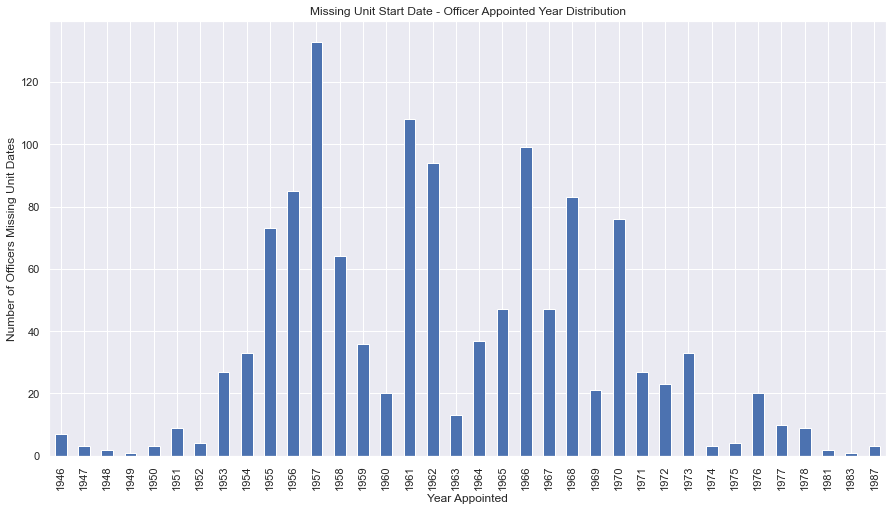

In [76]:
fig, ax = plt.subplots()
pd.to_datetime(df.loc[df.unit_start_date.isnull()].appointed_date.dropna()).dt.year.astype(int).value_counts().sort_index().plot(ax=ax, kind="bar")
fig.set_size_inches(15,8)
ax.set_title("Missing Unit Start Date - Officer Appointed Year Distribution")
ax.set_xlabel("Year Appointed")
ax.set_ylabel("Number of Officers Missing Unit Dates")
plt.show()

In [86]:
df[df[cons.id] == 20573]

,row_id,appointed_date,birth_year,race,gender,unit,unit_start_date,unit_end_date,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name,unit-history_2014-2020_2020-10_p596580_ID,row_count
80872,80873,1947-12-16,1920.0,WHITE,MALE,134,1960-12-01,1960-12-31,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80873,80874,1947-12-16,1920.0,WHITE,MALE,132,1961-01-01,1961-07-15,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80874,80875,1947-12-16,1920.0,WHITE,MALE,152,1961-07-16,1962-01-31,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80875,80876,1947-12-16,1920.0,WHITE,MALE,54,1962-02-01,1962-07-15,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80876,80877,1947-12-16,1920.0,WHITE,MALE,152,1962-07-16,1962-11-30,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80877,80878,1947-12-16,1920.0,WHITE,MALE,56,1962-12-01,1963-05-15,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80878,80879,1947-12-16,1920.0,WHITE,MALE,152,1963-05-16,1963-11-30,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80879,80880,1947-12-16,1920.0,WHITE,MALE,56,1963-12-01,1964-05-31,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80880,80881,1947-12-16,1920.0,WHITE,MALE,152,1964-06-01,1964-11-15,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27
80881,80882,1947-12-16,1920.0,WHITE,MALE,56,1964-11-16,1965-05-31,PAUL,PAUL,ANDERSON,ANDERSON,M,NaN,NaN,20573,27


In [100]:
null_end_dates = df.assign(null_end_date = df.unit_end_date.isnull()).groupby(cons.id)["null_end_date"].sum()

df.merge(null_end_dates, left_on=cons.id, right_index=True, how='left').query("null_end_date > 1").sort_values([cons.id, "unit_start_date"])

,row_id,appointed_date,birth_year,race,gender,unit,unit_start_date,unit_end_date,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name,unit-history_2014-2020_2020-10_p596580_ID,row_count,null_end_date
38423,38424,1971-02-22,1947.0,WHITE,MALE,5,1971-02-22,1979-10-14,ROBERT,ROBERT,SMITH,SMITH,E,NaN,NaN,9706,5,2
42490,42491,1971-02-22,1947.0,WHITE,MALE,11,1971-02-22,1981-12-09,ROBERT,ROBERT,SMITH,SMITH,E,NaN,NaN,9706,5,2
38424,38425,1971-02-22,1947.0,WHITE,MALE,602,1971-02-24,NaN,ROBERT,ROBERT,SMITH,SMITH,E,NaN,NaN,9706,5,2
42491,42492,1971-02-22,1947.0,WHITE,MALE,25,1981-12-10,1990-08-31,ROBERT,ROBERT,SMITH,SMITH,E,NaN,NaN,9706,5,2
42492,42493,1971-02-22,1947.0,WHITE,MALE,284,1990-09-01,NaN,ROBERT,ROBERT,SMITH,SMITH,E,NaN,NaN,9706,5,2
103163,103164,2005-12-05,1981.0,HISPANIC,MALE,44,2005-12-05,2007-05-23,THOMAS,THOMAS,VARGAS,VARGAS,NaN,NaN,NaN,26990,6,2
103269,103270,2005-12-05,1981.0,HISPANIC,MALE,44,2005-12-05,NaN,THOMAS,THOMAS,VARGAS,VARGAS,NaN,NaN,NaN,26990,6,2
103164,103165,2005-12-05,1981.0,HISPANIC,MALE,7,2007-05-24,2015-01-31,THOMAS,THOMAS,VARGAS,VARGAS,NaN,NaN,NaN,26990,6,2
103165,103166,2005-12-05,1981.0,HISPANIC,MALE,606,2015-02-01,2018-06-23,THOMAS,THOMAS,VARGAS,VARGAS,NaN,NaN,NaN,26990,6,2
103166,103167,2005-12-05,1981.0,HISPANIC,MALE,9,2018-06-24,2019-04-03,THOMAS,THOMAS,VARGAS,VARGAS,NaN,NaN,NaN,26990,6,2


In [15]:
import numpy as np

In [ ]:

df.to_csv(cons.output_file, **cons.csv_opts)
profiles_df.to_csv(cons.output_profiles_file, **cons.csv_opts)
